# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


## <font color="darkorange"> Note teoriche
### Calcolo di integrali con tecniche Monte Carlo
Si vuole valutare l'integrale:

$$
I = \int_{\Omega} g(\vec{x}) p(\vec{x}) \, d\vec{x}
$$

dove $p(\vec{x}) \geq 0$ per ogni $\vec{x} \in \Omega$ e $\int_{\Omega} p(\vec{x}) d\vec{x} = 1$.

Si estraggono $N$ campioni $\vec{x}_1, \ldots, \vec{x}_N$ distribuiti come $p(\vec{x})$.
La media aritmetica:
$$
G_N = \frac{1}{N} \sum_{i=1}^N g(\vec{x}_i)
$$

è un buon estimatore dell'integrale, poichè $\mathbb{E}[G_N] = I$, mentre la varianza della stima determina l'errore statistico:

$$
\epsilon = \frac{\sigma_I}{\sqrt{N}} \quad \text{dove} \quad \sigma_I^2 = \int g^2(\vec{x}) p(\vec{x}) \, d\vec{x} - I^2
$$

L’integrale da calcolare non deve necessariamente presentare esplicitamente una funzione $p(\vec{x})$ che soddisfi le proprietà di una distribuzione di probabilità. Si può semplicemente usare $p(\vec{x}) = 1/\Omega$ e $g(\vec{x}) = \Omega \cdot integranda$.

Per ottenere un errore $\epsilon$, il numero di campioni richiesti è:

$$
N = \frac{\sigma_I^2}{\epsilon^2}
$$

L’integrale $I$ può anche essere valutato con metodi di quadratura standard. Si supponga che il dominio di integrazione sia un ipercubo unitario $n$-dimensionale; allora l'integrazione numerica può essere scritta come:

$$
I \approx \sum_{i=1}^{N} w_i\, g(\vec{x}_i)\, p(\vec{x}_i)
$$
dove $\vec{x}_i$ è una griglia di $N$ punti che riempie l’ipercubo unitario e $w_i$ è una serie di pesi di quadratura.

In tal caso, l'errore è legato alla dimensione $h$ della griglia di campionamento e ad opportune costanti $c, k$ (che dipendono dal metodo di integrazione usato):

$$
\epsilon \leq c h^k
$$

Se si assume che il tempo necessario per una computazione sia proporzionale al numero totale di punti usati, allora:

$$
t_c \propto N = \gamma\, h^{-d}
$$
dove $\gamma$ è una costante dell’ordine dell’unità e $d$ è il numero di dimensioni.

L’equazione con il limite per l’errore può essere riscritta, e il tempo $t_c$ diventa:
$$
h \geq (\varepsilon/c)^{1/k} \quad \Rightarrow \quad t_c \propto \gamma\,c\,\varepsilon^{-d/k}
$$

Quindi maggiore è l’accuratezza richiesta in un calcolo, maggiore sarà il tempo computazionale.

Al contrario, la complessità temporale di un metodo Monte Carlo è:

$$
t_c = t_I N = t_I \frac{\sigma_I^2}{\epsilon^2} = Q_I \epsilon ^{-2}
$$

dove $t_I$ è il tempo per un singolo campione. Si osservi che, una volta fissata la precisione, l'esponente di $\epsilon$ è il medesimo, indipendentemente dal numero di dimensioni. Non a caso, a dimensioni molto alte, le tecniche Monte Carlo diventano più efficienti rispetto ai metodi di quadratura, perché la dipendenza dal numero di dimensioni è meno critica (si noti che comunque la convergenza statistica rimane lenta: l'errore decresce come $N^{-1/2}$, indipendentemente da $d$).

Il termine $Q_I = t_I \sigma_I^2$ misura l'**efficienza** del metodo Monte Carlo. Algoritmi Monte Carlo diversi possono avere valori differenti di $Q_I$. Un algoritmo più sofisticato può aumentare il costo per campione $t_I$ ma ridurre la varianza $\sigma_I^2$. La scelta dell'algoritmo migliore dipende dal bilancio tra tempo per campione e riduzione della varianza: in genere, si preferisce l'algoritmo con il valore più basso di $Q_I$.

---

### Importance sampling

Si supponga di voler stimare un integrale $n$-dimensionale della forma:

$$
I = \int g(\vec{x})\, p(\vec{x})\, d\vec{x}
$$

dove $p(\vec{x})$ è una distribuzione di probabilità, ma non necessariamente la più adatta per il calcolo Monte Carlo.
Si può introdurre una diversa distribuzione di probabilità $d(\vec{x})$, tale che $d(\vec{x}) \geq 0$, $\int d(\vec{x}) d\vec{x} = 1$ e $p(x)g(x)/d(x) < \infty$ eccetto su un insieme di punti di misura nulla, riscrivendo l'integrale come:

$$
I = \int \frac{g(\vec{x}) p(\vec{x})}{d(\vec{x})} d(\vec{x}) \, d\vec{x}
$$

La varianza dell'integrale stimato è:

$$
\operatorname{Var}[I] = \int \frac{(g(\vec{x}) p(\vec{x}))^2}{d(\vec{x})} d\vec{x} - I^2
$$

Si vuole scegliere $d(\vec{x})$ in modo da minimizzare la varianza, tenendo conto del vincolo di normalizzazione $\int d(\vec{x}) d\vec{x} = 1$. Introducendo un moltiplicatore di Lagrange $\lambda$ per imporre il vincolo, e ipotizzando $g(\vec{x}) \geq 0$, la soluzione ottimale risulta essere:

$$
d(\vec{x}) = \lambda g(\vec{x}) p(\vec{x}) \quad \text{e} \quad \lambda = \frac{1}{I}
$$
da cui si ricava che:

$$
d(\vec{x}) = \frac{g(\vec{x})p(\vec{x})}{I}
$$

Ma allora, campionando punti $\vec{x}_i$ distribuiti secondo $d(\vec{x})$, la stima Monte Carlo dell'integrale è:

$$
G_N = \frac{1}{N} \sum_{i=1}^N \frac{g(\vec{x}_i) p(\vec{x}_i)}{d(\vec{x}_i)} = \frac{1}{N} \sum_{i=1}^N I \frac{g(\vec{x}_i) p(\vec{x}_i)}{g(\vec{x}_i) p(\vec{x}_i)} = \frac{1}{N} \sum_{i=1}^N I = I
$$

Se si conoscesse la $d(\vec{x})$ esatta, data da  $\frac{g(\vec{x})p(\vec{x})}{I}$, ogni termine della sommatoria risulterebbe pari a $I$, e la varianza sarebbe nulla, garantendo un calcolo esatto dell'integrale.

Siccome in generale $I$ non è noto (e dunque nemmeno $d(\vec{x})$), l'idea è di scegliere $d(\vec{x})$ quanto più simile possibile a $g(\vec{x})p(\vec{x})$, in modo da minimizzare la varianza e garantire una migliore efficienza nel calcolo Monte Carlo.

Tale procedura per il calcolo di integrali prende il nome di **importance sampling**.

---

### Processi stocastici e catene di Markov

Un **processo stocastico** è una famiglia di variabili aleatorie $\{X(t)\}_{t \in T}$ indicizzate dal tempo (o da un'altra variabile). Ogni istante $t$ è associato a una variabile casuale $X(t)$, che descrive l'evoluzione nel tempo di un sistema soggetto ad aleatorietà. Se $t$ è discreto ($t \in \mathbb{N}$), si parla di **catena di Markov**; se $t$ è continuo ($t \in \mathbb{R}$), si ha un **processo stocastico continuo**. Un processo stocastico $\{X(t)\}_{t \in T}$, per ogni insieme finito $t_1 < t_2 < \ldots t_n$ rappresenta una variabile aleatoria caratterizzata da una distribuzione di probabilità congiunta a $n$ punti della forma $p_n(x_1, t_1; \ldots ; x_n, t_n)$, che soddisfa:

- Positività:  
  $$
  p_n(x_1, t_1; \dots; x_n, t_n) \ge 0
  $$

- Completezza:  
  $$
  \int \ldots \int p_n(x_1,t_1; \ldots ; x_n, t_n)\,dx_1 \ldots dx_n = 1
  $$

- Proprietà di marginalizzazione (integrando la distribuzione congiunta $p_n$ rispetto all’ultima variabile si ottiene la distribuzione congiunta di ordine inferiore):
  $$
  \int p_n(x_1,t_1;\dots;x_n,t_n)\,dx_n =
  p_{n-1}(x_1,t_1;\dots;x_{n-1},t_{n-1})
  $$

Un **processo stocastico** $\{X(t)\}_{t \in T}$ è detto **processo markoviano** (o **catena di Markov**, nel caso discreto) se la probabilità di transizione allo stato futuro dipende solo dallo stato attuale e non dalla storia passata, cioè:

$$
p_{1|n-1}(x_n, t_n \mid x_1, t_1; \ldots; x_{n-1}, t_{n-1}) = p_{1|1}(x_n, t_n \mid x_{n-1}, t_{n-1})
$$

per ogni $n$ e per ogni sequenza temporale $t_1 < t_2 < \dots < t_n$.

Questo significa che il processo "non ha memoria": conoscere lo stato attuale $x_{n-1}$ al tempo $t_{n-1}$ è sufficiente per determinare la probabilità dello stato successivo $x_n$ al tempo $t_n$.

Grazie alla proprietà markoviana, la probabilità congiunta di una sequenza di stati può essere scritta come:

$$
p_n(x_1, t_1; \ldots; x_n, t_n) = p_1(x_1, t_1) \prod_{l=2}^n p_{1|1}(x_l, t_l \mid x_{l-1}, t_{l-1})
$$

Dunque, un processo markoviano è completamente determinato dalla probabilità iniziale $p_1(x_1, t_1)$ e dalle probabilità di transizione a due punti $p_{1|1}(x', t' \mid x, t)$.

La coerenza temporale delle probabilità di transizione in un processo markoviano è espressa dall'**equazione di Chapman-Kolmogorov**.
Sia $P(x,t \mid x_0, t_0)$ la probabilità di transizione dallo stato $x_0$ al tempo $t_0$ allo stato $x$ al tempo $t$, allora:

$$
P(x, t \mid x_0, t_0) = \int P(x, t \mid x', t') \, P(x', t' \mid x_0, t_0) \, dx'
\quad \text{per ogni} \quad t_0 < t' < t
$$

Se due funzioni positive e normalizzate $ p_1(x, t)$ e $p_{1|1}(x', t' \mid x, t)$ soddisfano:

- equazione di Chapman-Kolmogorov
- evoluzione della distribuzione marginale: $p_1(x_2, t_2) = \int p_{1|1}(x_2, t_2 \mid x_1, t_1) \cdot p_1(x_1, t_1) \, dx_1$

allora esse definiscono completamente e univocamente un processo markoviano.

---

Un **random walk (RW)** è il processo stocastico markoviano definito come:

$$
X_n = \sum_{i=1}^{n} \xi_i \quad n \in \mathbb{N}
$$

dove $\xi_i$ sono variabili aleatorie i.i.d. . Rappresenta la formalizzazione matematica di una traiettoria costituita da punti randomici successivi. Si consideri il random walk di una particella su un reticolo infinito 1D, con passo $a$ lungo l'asse $x$, e sia $\tau$ l'intervallo di tempo tra due step successivi del random walk. Si può dimostrare che, nel limite continuo, la probabilità $p_1(x, t)$ di trovare la particella nella posizione $x = na$ $(n \in \mathbb{Z})$ del reticolo al tempo $t = N \tau$, dopo $N$ steps soddisfa l'**equazione di diffusione**:

$$
\frac{\partial p_1(x,t)}{\partial t} = D \frac{\partial^2 p_1(x,t)}{\partial x^2}
$$
dove $D =  a^2/2 \tau$ è il **coefficiente di diffusione**.

Supponendo $ p_1(x, 0) = \delta(x)$ (il cammino origina da $x = 0$), si dimostra che la forma di $p_1(x, t)$ è la seguente:
$$
p_1(x, t) = \frac{1}{\sqrt{4\pi D t}} \, e^{\frac{-x^2}{4Dt}}
$$
cioè una Gaussiana con:
- Valore atteso:$\mathbb{E}[x(t)] = 0$

- Varianza: $\mathbb{E}[x^2(t)] = 2Dt$


Di conseguenza, il cammino medio cresce come: 
$$
\text{Cammino medio} = \sqrt{\mathbb{E}[x^2(t)]} = \sqrt{2Dt} = a \sqrt{N}
$$

---

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### *Esercizio 02.1 - Soluzione proposta*
Per svolgere la prima parte di questo esercizio, si è operato secondo quanto riportato nella sezione teorica. Si assuma che l'integrale da calcolare abbia la forma $I = \int_{[0, 1]} g(x) p(x) \, dx$, dove $p(x)$ rappresenta la distribuzione uniforme in $[0, 1]$. In quanto tale soddisfa le seguenti condizioni: 
- $p(x) \geq 0$ per ogni $x \in [0, 1]$,
- $\int_{[0, 1]} p(x) dx = 1$.
  
Con questa scelta, la funzione integranda da considerare è $g(x) = \frac{\pi}{2}\cos(\pi x/2)$, e la stima Monte Carlo dell’integrale diventa semplicemente una media di $g(x)$ su punti $x$ distribuiti uniformemente. Si è operato usando il metodo del data blocking: le $M=10^6$ estrazioni totali sono state suddivise in $N = 100$ blocchi, da $L = M/N = 10^4$ estrazioni ciascuno. Per ogni blocco, estraggono dunque $L$ numeri casuali $x_i$ uniformemente distribuiti in $[0, 1)$, si calcola $g(x_i)$ e si valuta l'integrale $I$ usando lo stimatore $G_L = \frac{1}{L} \sum_{i=1}^L g(x_i)$.

Per ogni blocco è stata calcolata la media $G_L$ e, da queste, la media progressiva delle medie dei blocchi. L’incertezza sulla stima è stata valutata tramite la deviazione standard della media progressiva. 

Il grafico sottostante mostra l'andamento della media progressiva, con relativa incertezza, in funzione del numero di blocchi considerati. Si osserva compatibilità tra i risultati ottenuti e il valore atteso $I_{true}=1$.

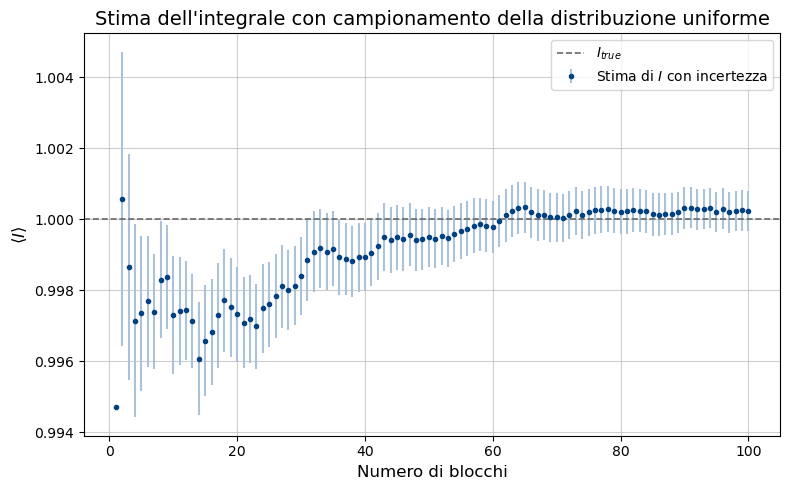

In [176]:
import numpy as np
import matplotlib.pyplot as plt

x1, y1, err1 = np.loadtxt("Es02.1/integral.dat", unpack=True)

plt.figure(figsize=(8, 5))
plt.errorbar(x1, y1, yerr=err1, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label=r'Stima di $I$ con incertezza')
plt.title("Stima dell'integrale con campionamento della distribuzione uniforme", fontsize=14)
plt.xlabel("Numero di blocchi", fontsize=12)
plt.ylabel(r'$\langle I \rangle$', fontsize=12)
plt.axhline(y=1, color='dimgray', linestyle='--', linewidth=1.2, label='$I_{true}$')
plt.grid(True, alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Nella seconda parte dell'esercizio, è stato utilizzato il metodo dell'importance sampling. L'idea è di scegliere una distribuzione di probabilità $d(x)$ quanto più simile possibile a $g(x)p(x)$, in modo da minimizzare nel calcolo la varianza e massimizzare l'efficienza nel calcolo Monte Carlo. Si è scelta $d(x)=2(1-x)$, ossia lo sviluppo di Taylor dell'integranda centrato in 0 e normalizzato a 1. Per costruire il generatore di numeri casuali distribuiti secondo $d(x)$ è stato utilizzato il metodo dell'inversa della cumulativa (come spiegato nell'Esercizio 01.2), ottenendo:

$$
x = 1 - \sqrt{1-y}
$$
con $y$ uniformemente distribuito in $[0, 1)$.

Come prima, le $M = 10^6$ estrazioni totali sono state suddivise in $N = 100$ blocchi, da $L = M/N = 10^4$ estrazioni ciascuno. Per ogni blocco, si estraggono $L$ numeri casuali $x_i$ distribuiti secondo $d(x)$ e si valuta l'integrale usando lo stimatore $G_L = \frac{1}{L} \sum_{i=1}^L \frac{g(x_i) p(x_i)}{d(x_i)}$.

Per ogni blocco è stata calcolata la media $G_L$ e, da queste, la media progressiva delle medie dei blocchi. L’incertezza sulla stima è stata valutata tramite la deviazione standard della media progressiva. 

Come prima, il grafico sottostante mostra l’andamento delle medie progressive, con relative incertezze, in funzione del numero di blocchi considerati. Si osserva ancora compatibilità con il valore atteso dell'integrale $I_{true}=1$.

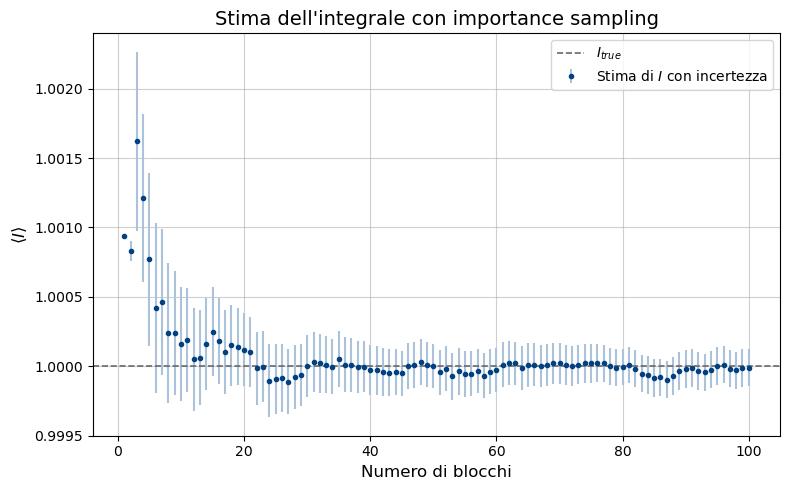

In [178]:
x2, y2, err2 = np.loadtxt("Es02.1/integral_sampl.dat", unpack=True)
plt.figure(figsize=(8, 5))
plt.errorbar(x2, y2, yerr=err2, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label=r'Stima di $I$ con incertezza')
plt.title("Stima dell'integrale con importance sampling", fontsize=14)
plt.xlabel("Numero di blocchi", fontsize=12)
plt.ylabel(r'$\langle I \rangle$', fontsize=12)
plt.axhline(y=1, color='dimgray', linestyle='--', linewidth=1.2, label='$I_{true}$')
plt.grid(True, alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

### *Esercizio 02.2 - Soluzione proposta*
Nell’esercizio proposto sono stati simulati due tipi di random walk: discreto e continuo.  

Per costruire il cammino, è stata definita nel codice la seguente struttura: `vector<vector<double>> RW(N_steps + 1, vector<double>(3, 0.0))`.

`RW` è un contenitore `vector` (della STL) di dimensione $N_{\text{steps}} + 1$, in cui ogni elemento rappresenta una posizione nello spazio tridimensionale $(x, y, z)$. Tutte le posizioni sono inizializzate a zero. In particolare, `RW[0]` rappresenta l’origine, mentre i successivi $N_{\text{steps}}$ elementi vengono aggiornati ad ogni passo del cammino con le corrispondenti coordinate spaziali.

Nel caso del random walk discreto, ad ogni step viene estratto un numero pseudocasuale intero tra 0 e 5 (tutti equiprobabili). Questo valore determina una delle sei direzioni possibili sul reticolo: $(\pm x \, \pm y \, \pm z)$. Il passo è fissato ad ampiezza unitaria $a = 1$, e la nuova posizione è aggiornata in base alla direzione estratta. Il cammino complessivo è composto da $N_{\text{steps}} = 100$ passi.

Per stimare il valore medio del quadrato della distanza dal punto di partenza dopo $N$ passi, ovvero $\langle r^2(N) \rangle$, sono stati eseguiti $M = 10^4$ cammini indipendenti, suddivisi in $N = 100$ blocchi, ciascuno contenente $L = M / N = 100$ cammini.

Per ciascun blocco è stata calcolata la media del quadrato della distanza $r^2(N)$ in funzione del numero N di passi.  
Successivamente, è stato applicato il metodo della media a blocchi per ottenere una stima del valore medio $\langle r^2(N) \rangle$, e infine $\sqrt{\langle r^2(N) \rangle}$ con il relativo errore statistico, calcolato tramite propagazione degli errori.

Di seguito si riportano il plot ottenuto nel caso di RW discreto.

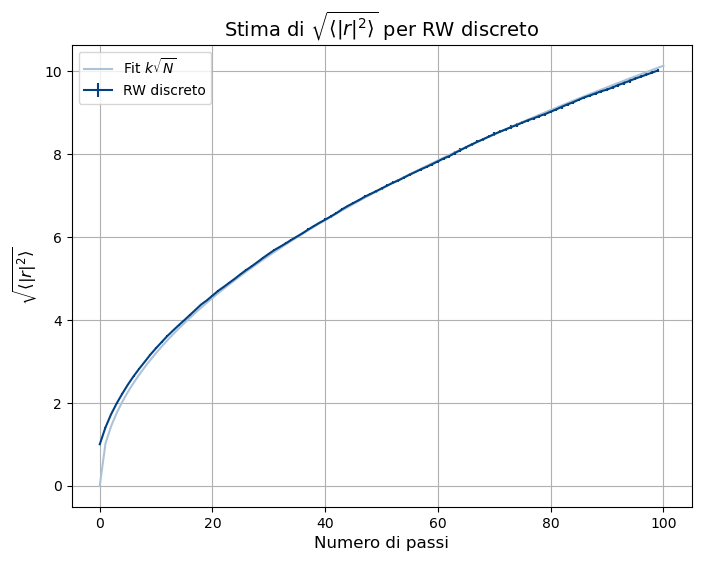


La miglior $k$ per il fit dei dati risulta essere:
- $k$ = 1.0133522002304052

compatibile con lo step $a$ = 1 del random walk.


In [182]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def sqrt_func(x, k):
    return k * np.sqrt(x)

with open('Es02.2/RW_discrete_distance.dat') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        r_av = [float(line.split()[1]) for line in lines]
        r_err = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(8, 6))
plt.errorbar(x, r_av, r_err, color = 'xkcd:darkish blue', label='RW discreto')

popt, _ = curve_fit(sqrt_func, x, r_av)
x_fit = np.linspace(0, 100, 100)
y_fit = sqrt_func(x_fit, *popt)
plt.plot(x_fit, y_fit, color='xkcd:cloudy blue', label=r'Fit $k\sqrt{N}$')

plt.title(r'Stima di $\sqrt{\langle|r|^2 \rangle}$ per RW discreto', fontsize = 14)
plt.xlabel('Numero di passi', fontsize = 12)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle}$', fontsize = 12)
plt.legend()

plt.grid(True)
plt.show()

md_text = rf"""
La miglior $k$ per il fit dei dati risulta essere:
- $k$ = {popt[0]}

compatibile con lo step $a$ = 1 del random walk.
"""
md_cell = get_ipython().run_cell_magic('markdown', '', md_text)

Nel caso del random walk continuo, ogni passo viene effettuato in una direzione casuale qualsiasi, con uguale probabilità per tutte le direzioni. Ciò equivale a generare uno step uniformemente distribuito sulla superficie di una sfera di raggio unitario, essendo il passo $a = 1$. Per fare questo, è necessario campionare l'angolo solido $(\theta, \phi)$ in modo uniforme:

- L'angolo azimutale $\phi$ può essere estratto uniformemente in $[0, 2\pi]$, poiché si distribuisce naturalmente in modo uniforme attorno all’asse $z$;
- L'angolo polare $\theta$, invece, non può essere estratto uniformemente in $[0, \pi]$ se si vuole ottenere una distribuzione uniforme sulla sfera.

Infatti, l'area elementare sulla superficie della sfera associata a un intervallo $d\theta$ è:

$$
dA = \sin\theta \, d\theta \, d\phi
$$

Essa è proporzionale a $\sin\theta$: quindi è massima all’equatore ($\theta = \pi/2$) e minima ai poli ($\theta = 0$ o $\pi$). Campionare $\theta$ uniformemente in $[0, \pi]$ porterebbe quindi a una densità di punti eccessiva vicino ai poli e troppo scarsa all’equatore.

Per garantire una distribuzione uniforme sulla superficie sferica, si campiona invece $\cos\theta$ uniformemente in $[-1, 1]$. In questo modo, ogni fascia della sfera è trattata uguale probabilità, rispecchiando la vera geometria della superficie. A partire da $\cos\theta$ si calcola $\sin\theta = \sqrt{1 - \cos^2\theta}$, sempre positivo perché $\theta \in [0, \pi]$.

La posizione viene infine aggiornata effettuando uno step unitario nella direzione definita da $(\theta, \phi)$.

Anche nel caso continuo, per stimare il valore medio del quadrato della distanza dal punto di partenza dopo $N$ passi, sono stati effettuati $M = 10000$ cammini indipendenti, suddivisi in $N = 100$ blocchi, ciascuno contenente $L = M/N = 100$ cammini.

Per ciascun blocco è stata calcolata la media di $r^2(N)$ in funzione del numero di passi. È stata poi applicata la media a blocchi per stimare il valore medio $\langle r^2(N) \rangle$, e infine $\sqrt{\langle r^2(N) \rangle}$ con il relativo errore statistico, calcolato tramite propagazione degli errori.

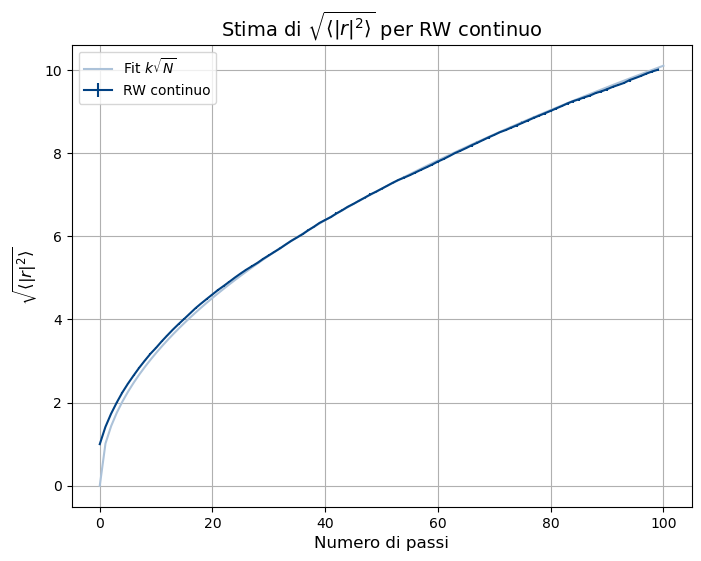


La miglior $k$ per il fit dei dati risulta essere:
- $k$ = 1.0105192397207072

compatibile con lo step $a$ = 1 del random walk.


In [184]:
with open('Es02.2/RW_continuum_distance.dat') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        r_av = [float(line.split()[1]) for line in lines]
        r_err = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(8, 6))
plt.errorbar(x, r_av, r_err, color = 'xkcd:darkish blue', label='RW continuo')

popt, _ = curve_fit(sqrt_func, x, r_av)
x_fit = np.linspace(0, 100, 100)
y_fit = sqrt_func(x_fit, *popt)
plt.plot(x_fit, y_fit, color='xkcd:cloudy blue', label=r'Fit $k\sqrt{N}$')

plt.title(r'Stima di $\sqrt{\langle |r|^2 \rangle}$ per RW continuo', fontsize = 14)
plt.xlabel('Numero di passi', fontsize = 12)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle}$', fontsize = 12)
plt.legend()

plt.grid(True)
plt.show()

md_text = rf"""
La miglior $k$ per il fit dei dati risulta essere:
- $k$ = {popt[0]}

compatibile con lo step $a$ = 1 del random walk.
"""
md_cell = get_ipython().run_cell_magic('markdown', '', md_text)

Per entrambi i cammini si osserva che $\sqrt{\langle |r|^2 \rangle} \sim a \sqrt{N}$. Ciò denota come il random walk segua la legge scalare tipica di un processo diffusivo standard.